# Quantum Teleportation Algorithm

Quantum teleportation is the act of transfering the state of a qubit to another qubit. The act of copying is simple for classical bits. However, for quantum bits, when we try to copy the state of a qubit, we are performing a measuremnt, which would then destroy the state of the qubit. Hence we need to build a circuit to get around this problem, which uses the concept of entanglement.

In [2]:
from qiskit import *
%matplotlib inline

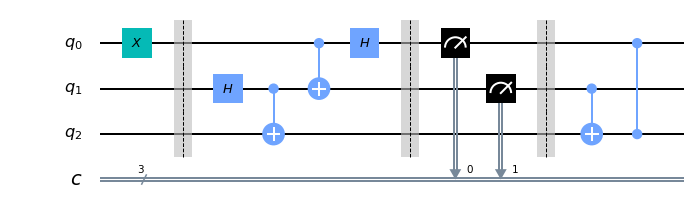

In [6]:
circuit = QuantumCircuit(3, 3)

# The quantum state that needs to be transferred
circuit.x(0)
circuit.barrier()

circuit.h(1)
circuit.cx(1,2)
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()

circuit.measure([0, 1], [0, 1])
circuit.barrier()

circuit.cx(1,2)
circuit.cz(0,2)

circuit.draw(output='mpl')

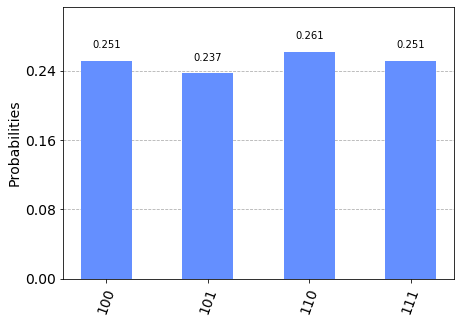

In [4]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [5]:
print(counts)

{'110': 267, '111': 257, '100': 257, '101': 243}
